In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
import torchvision
import glob
import random
from model import AE
import pickle
from torch.utils.tensorboard import SummaryWriter
import os

In [2]:
class Dataloader:
    def __init__(self,datas):
        self.train = datas
    def __len__(self):
        return len(self.train)

    def __getitem__(self, idx):
        data  =self.train[idx]
        data = pd.read_csv(data, encoding = "ISO-8859-1", skiprows=11,delim_whitespace =True,header = None)
        out = data.loc[:,0].values[None].astype("float32")
        out = (out-out.min())/(out.max()-out.min())
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=2048)
checkpoint = torch.load("./logs/iter1_l1loss+512dim/epoch95.pth")
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [3]:
with open("data.pkl","rb") as f:
    datas = pickle.load(f)

test_datas = datas["Train"]
train_datas = datas["Test"]


train_dataset = Dataloader(train_datas)

test_dataset = Dataloader(test_datas)

In [4]:
data = test_dataset[1]

In [5]:
with torch.no_grad():
    out = model(torch.from_numpy(data))

In [6]:
out

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4736]])

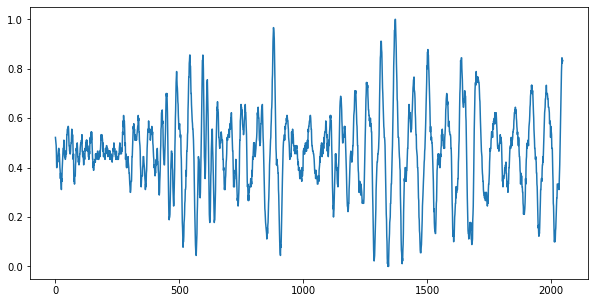

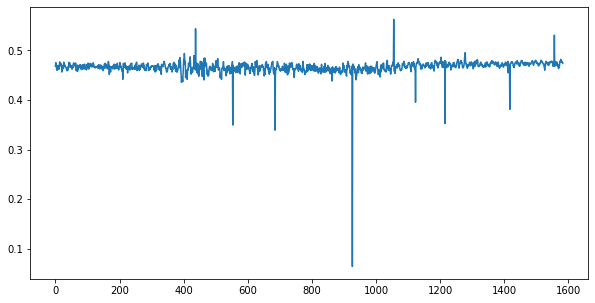

In [11]:
plt.figure(figsize = (10,5))
plt.plot(data[0])
plt.figure(figsize = (10,5))
plt.plot(out[0][out[0].cpu().numpy()>0])

tensor([0.4679, 0.4752, 0.4746,  ..., 0.4769, 0.4762, 0.4736])